## Detect Smiling faces 

The aim is to build an artificial neural network that can detect smiling faces. The train set contains 600 examples. The test set has 150 examples.

---

In [1]:
# Import libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import h5py
import random 

In [2]:
# Import dataset

filename = '/Users/mareksturek/Documents/GitHub/real-application/data/train_happy.h5'
f = h5py.File(filename, 'r')

for key in f.keys():
    print(key) #Names of the groups in HDF5 file.

list_classes
train_set_x
train_set_y


In [3]:
# Train and test datasets

happy_training = h5py.File('/Users/mareksturek/Documents/GitHub/real-application/data/train_happy.h5', "r")
happy_testing  = h5py.File('/Users/mareksturek/Documents/GitHub/real-application/data/test_happy.h5', "r")

In [4]:
# Numpy arrays

X_train = np.array(happy_training["train_set_x"][:]) 
y_train = np.array(happy_training["train_set_y"][:]) 

X_test = np.array(happy_testing["test_set_x"][:])
y_test = np.array(happy_testing["test_set_y"][:]) 


print(X_train.shape)
print(X_train)

print(y_train.shape)
print(y_train)

(600, 64, 64, 3)
[[[[178 190 163]
   [172 181 173]
   [188 196 184]
   ...
   [255 255 254]
   [254 255 250]
   [249 253 222]]

  [[184 201 165]
   [149 154 142]
   [149 158 139]
   ...
   [255 255 253]
   [254 255 250]
   [251 255 230]]

  [[198 207 165]
   [141 147 128]
   [168 184 154]
   ...
   [253 255 244]
   [254 255 248]
   [253 255 233]]

  ...

  [[ 77  82  89]
   [ 60  64  68]
   [ 49  53  55]
   ...
   [ 31  32  30]
   [ 47  48  46]
   [ 75  75  75]]

  [[ 68  71  76]
   [ 55  58  59]
   [ 44  47  47]
   ...
   [ 30  31  29]
   [ 40  41  39]
   [ 63  64  63]]

  [[ 61  64  66]
   [ 52  54  54]
   [ 45  47  46]
   ...
   [ 30  31  29]
   [ 38  38  36]
   [ 56  56  54]]]


 [[[193 204 168]
   [188 203 155]
   [215 227 181]
   ...
   [219 215 208]
   [191 185 170]
   [173 165 142]]

  [[201 213 182]
   [200 214 169]
   [204 215 164]
   ...
   [254 254 252]
   [224 231 222]
   [201 212 184]]

  [[204 213 178]
   [211 220 184]
   [207 215 175]
   ...
   [242 248 240]
   [200 219

0


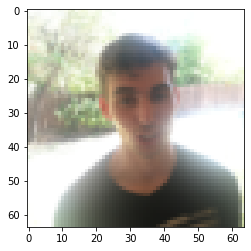

In [5]:
# Visualize dataset

i = random.randint(1,600) 
plt.imshow( X_train[i] )
print(y_train[i])

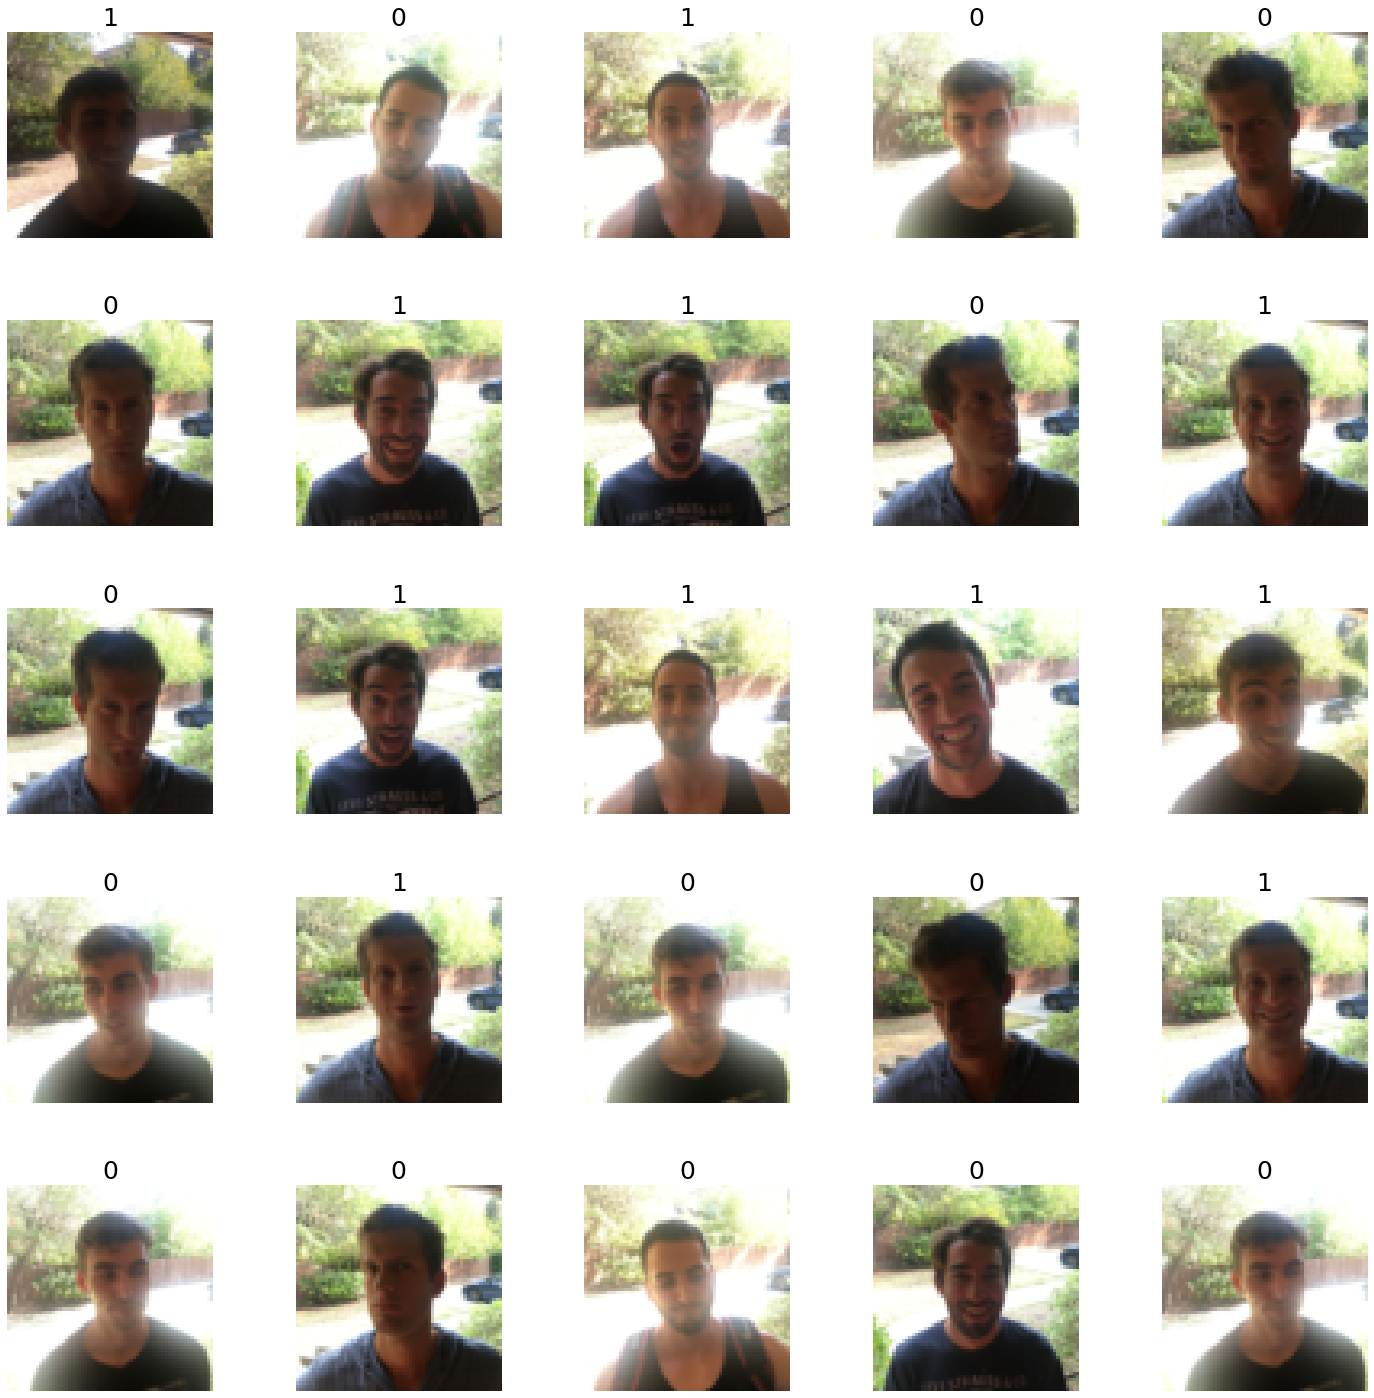

In [6]:
#  More images in a grid format

# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index])
    axes[i].set_title(y_train[index], fontsize = 25)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [7]:
# Let's normalize dataset

X_train = X_train/255
X_test = X_test/255

In [8]:
print(X_train)

[[[[0.69803922 0.74509804 0.63921569]
   [0.6745098  0.70980392 0.67843137]
   [0.7372549  0.76862745 0.72156863]
   ...
   [1.         1.         0.99607843]
   [0.99607843 1.         0.98039216]
   [0.97647059 0.99215686 0.87058824]]

  [[0.72156863 0.78823529 0.64705882]
   [0.58431373 0.60392157 0.55686275]
   [0.58431373 0.61960784 0.54509804]
   ...
   [1.         1.         0.99215686]
   [0.99607843 1.         0.98039216]
   [0.98431373 1.         0.90196078]]

  [[0.77647059 0.81176471 0.64705882]
   [0.55294118 0.57647059 0.50196078]
   [0.65882353 0.72156863 0.60392157]
   ...
   [0.99215686 1.         0.95686275]
   [0.99607843 1.         0.97254902]
   [0.99215686 1.         0.91372549]]

  ...

  [[0.30196078 0.32156863 0.34901961]
   [0.23529412 0.25098039 0.26666667]
   [0.19215686 0.20784314 0.21568627]
   ...
   [0.12156863 0.1254902  0.11764706]
   [0.18431373 0.18823529 0.18039216]
   [0.29411765 0.29411765 0.29411765]]

  [[0.26666667 0.27843137 0.29803922]
   [0.2

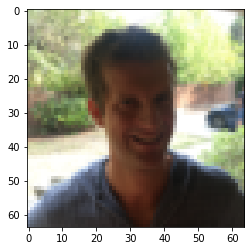

In [9]:
# Slow plot 

plt.imshow(X_train[9]);

In [10]:
# Build the CNN model

import tensorflow as tf

cnn = tf.keras.Sequential()

cnn.add(tf.keras.layers.Conv2D(64, (6,6), activation = 'relu', input_shape = (64,64,3)))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))

# cnn.add(tf.keras.layers.Dropout(0.2))

cnn.add(tf.keras.layers.Conv2D(64, (5,5), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(128, activation = 'relu'))

cnn.add(tf.keras.layers.Dense(64, activation = 'relu'))

cnn.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 59, 59, 64)        6976      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8

In [11]:
# Compile the CNN model

cnn.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
# Train the CNN model

history = cnn.fit(X_train,
                 y_train, 
                 batch_size = 30,
                 epochs = 30,
                 verbose = 1)

Epoch 1/30
20/20 [==============================] - 6s 286ms/step - loss: 0.7071 - accuracy: 0.5300
Epoch 2/30
20/20 [==============================] - 6s 306ms/step - loss: 0.6747 - accuracy: 0.5417
Epoch 3/30
20/20 [==============================] - 5s 243ms/step - loss: 0.5669 - accuracy: 0.7000
Epoch 4/30
20/20 [==============================] - 4s 223ms/step - loss: 0.4073 - accuracy: 0.8083
Epoch 5/30
20/20 [==============================] - 5s 271ms/step - loss: 0.2848 - accuracy: 0.9067
Epoch 6/30
20/20 [==============================] - 5s 270ms/step - loss: 0.2358 - accuracy: 0.9100
Epoch 7/30
20/20 [==============================] - 6s 283ms/step - loss: 0.1903 - accuracy: 0.9250
Epoch 8/30
20/20 [==============================] - 6s 287ms/step - loss: 0.1876 - accuracy: 0.9250
Epoch 9/30
20/20 [==============================] - 5s 261ms/step - loss: 0.1666 - accuracy: 0.9267
Epoch 10/30
20/20 [==============================] - 6s 281ms/step - loss: 0.1349 - accuracy: 0.9550

In [13]:
# Evaluate CNN model

evaluation = cnn.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

5/5 [==============================] - 0s 63ms/step - loss: 0.3025 - accuracy: 0.9200
Test Accuracy : 0.920


In [14]:
# Keys of the CNN model

history.history.keys()

dict_keys(['loss', 'accuracy'])

In [15]:
# Accuracy and lost 

accuracy = history.history['accuracy']
loss = history.history['loss']

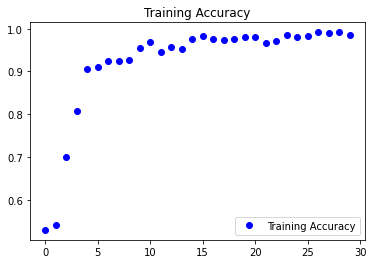

In [16]:
# Plot accuracy

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.title('Training Accuracy')
plt.legend()

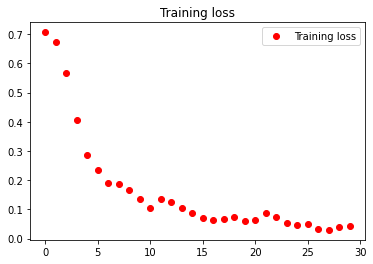

In [17]:
# Plot lost 

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.title('Training loss')
plt.legend()

In [18]:
# Predicsion

predicted_classes = cnn.predict_classes(X_test)
y_true = y_test

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


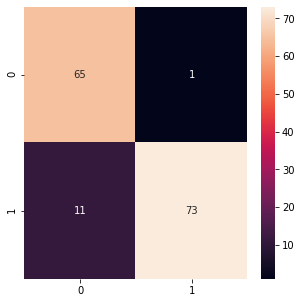

In [19]:
# Confusion matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True);

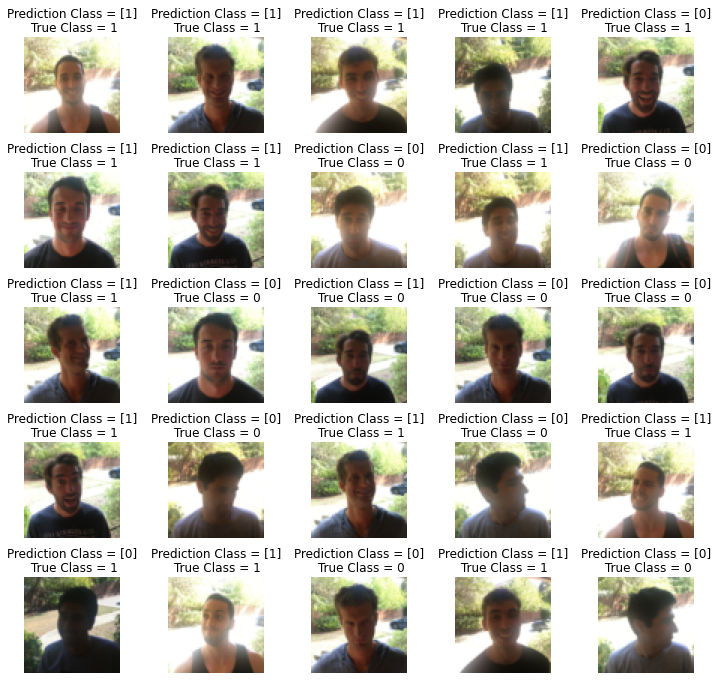

In [20]:
# Show the predicion 

L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction Class = {}\n True Class = {}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

# axes[i].set_title("Guess{}\n True{}".format(predicted_class[i], y_test[i]))

In [21]:
# Classification report 

from sklearn.metrics import classification_report

print(classification_report(y_test.T, predicted_classes))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92        66
           1       0.99      0.87      0.92        84

    accuracy                           0.92       150
   macro avg       0.92      0.93      0.92       150
weighted avg       0.93      0.92      0.92       150

